In [6]:
# Import Libraries
#After import x, you can refer to things in x like x.something. 
#After from x import *, you can refer to things in x directly just as something. Because the second form imports the names directly into the local namespace, it creates the potential for conflicts if you import things from many modules. Therefore, the from x import * is discouraged.
#You can also do from x import something, which imports just the something into the local namespace, not everything in x. This is better because if you list the names you import, you know exactly what you are importing and it's easier to avoid name conflicts.
#from urllib import request , # access request directly. mine = request()
# import urllib.request # used as urllib.request , mine = urllib.request()
import pandas 
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
from pandas.tools.plotting import parallel_coordinates 

In [7]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [8]:
# head
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Populating the interactive namespace from numpy and matplotlib


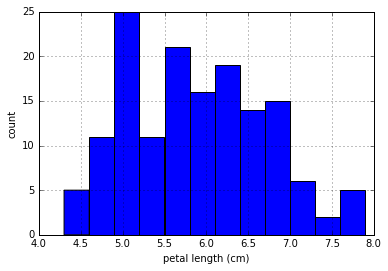

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Compute number of data points: n_data
mydata=np.array(dataset.iloc[:,0])  #or dataset.values[:,0]
#type(mydata)

n_data=len(mydata)

# Number of bins is the square root of number of data points: n_bins
n_bins=np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins=int(n_bins)

# Plot the histogram
plt.switch_backend('Agg') 
%pylab inline 
plt.hist(mydata,bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.grid()
plt.show()


In [10]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [11]:
def source_setter(predictions):
    flowers=['http://wildgingerfarm.com/_Media/iris-setosa-ssp-canadensis.jpeg',
         'https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg',
        'https://www.seedman.com/image/sf092.jpg']
    if(predictions=='Iris-setosa'):
        img=flowers[0]
    elif (predictions=='Iris-versicolor'):
        img=flowers[1]
    elif (predictions=='Iris-virginica'):
        img = flowers[2]
    return img

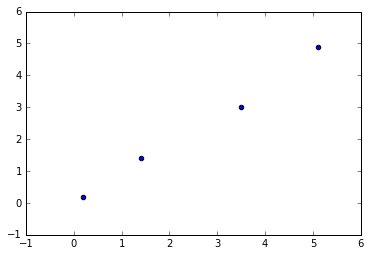

In [12]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

import matplotlib.pyplot as plt
plt.scatter(X[0],X[1])

In [13]:
knn = KNeighborsClassifier()
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

['Iris-versicolor']


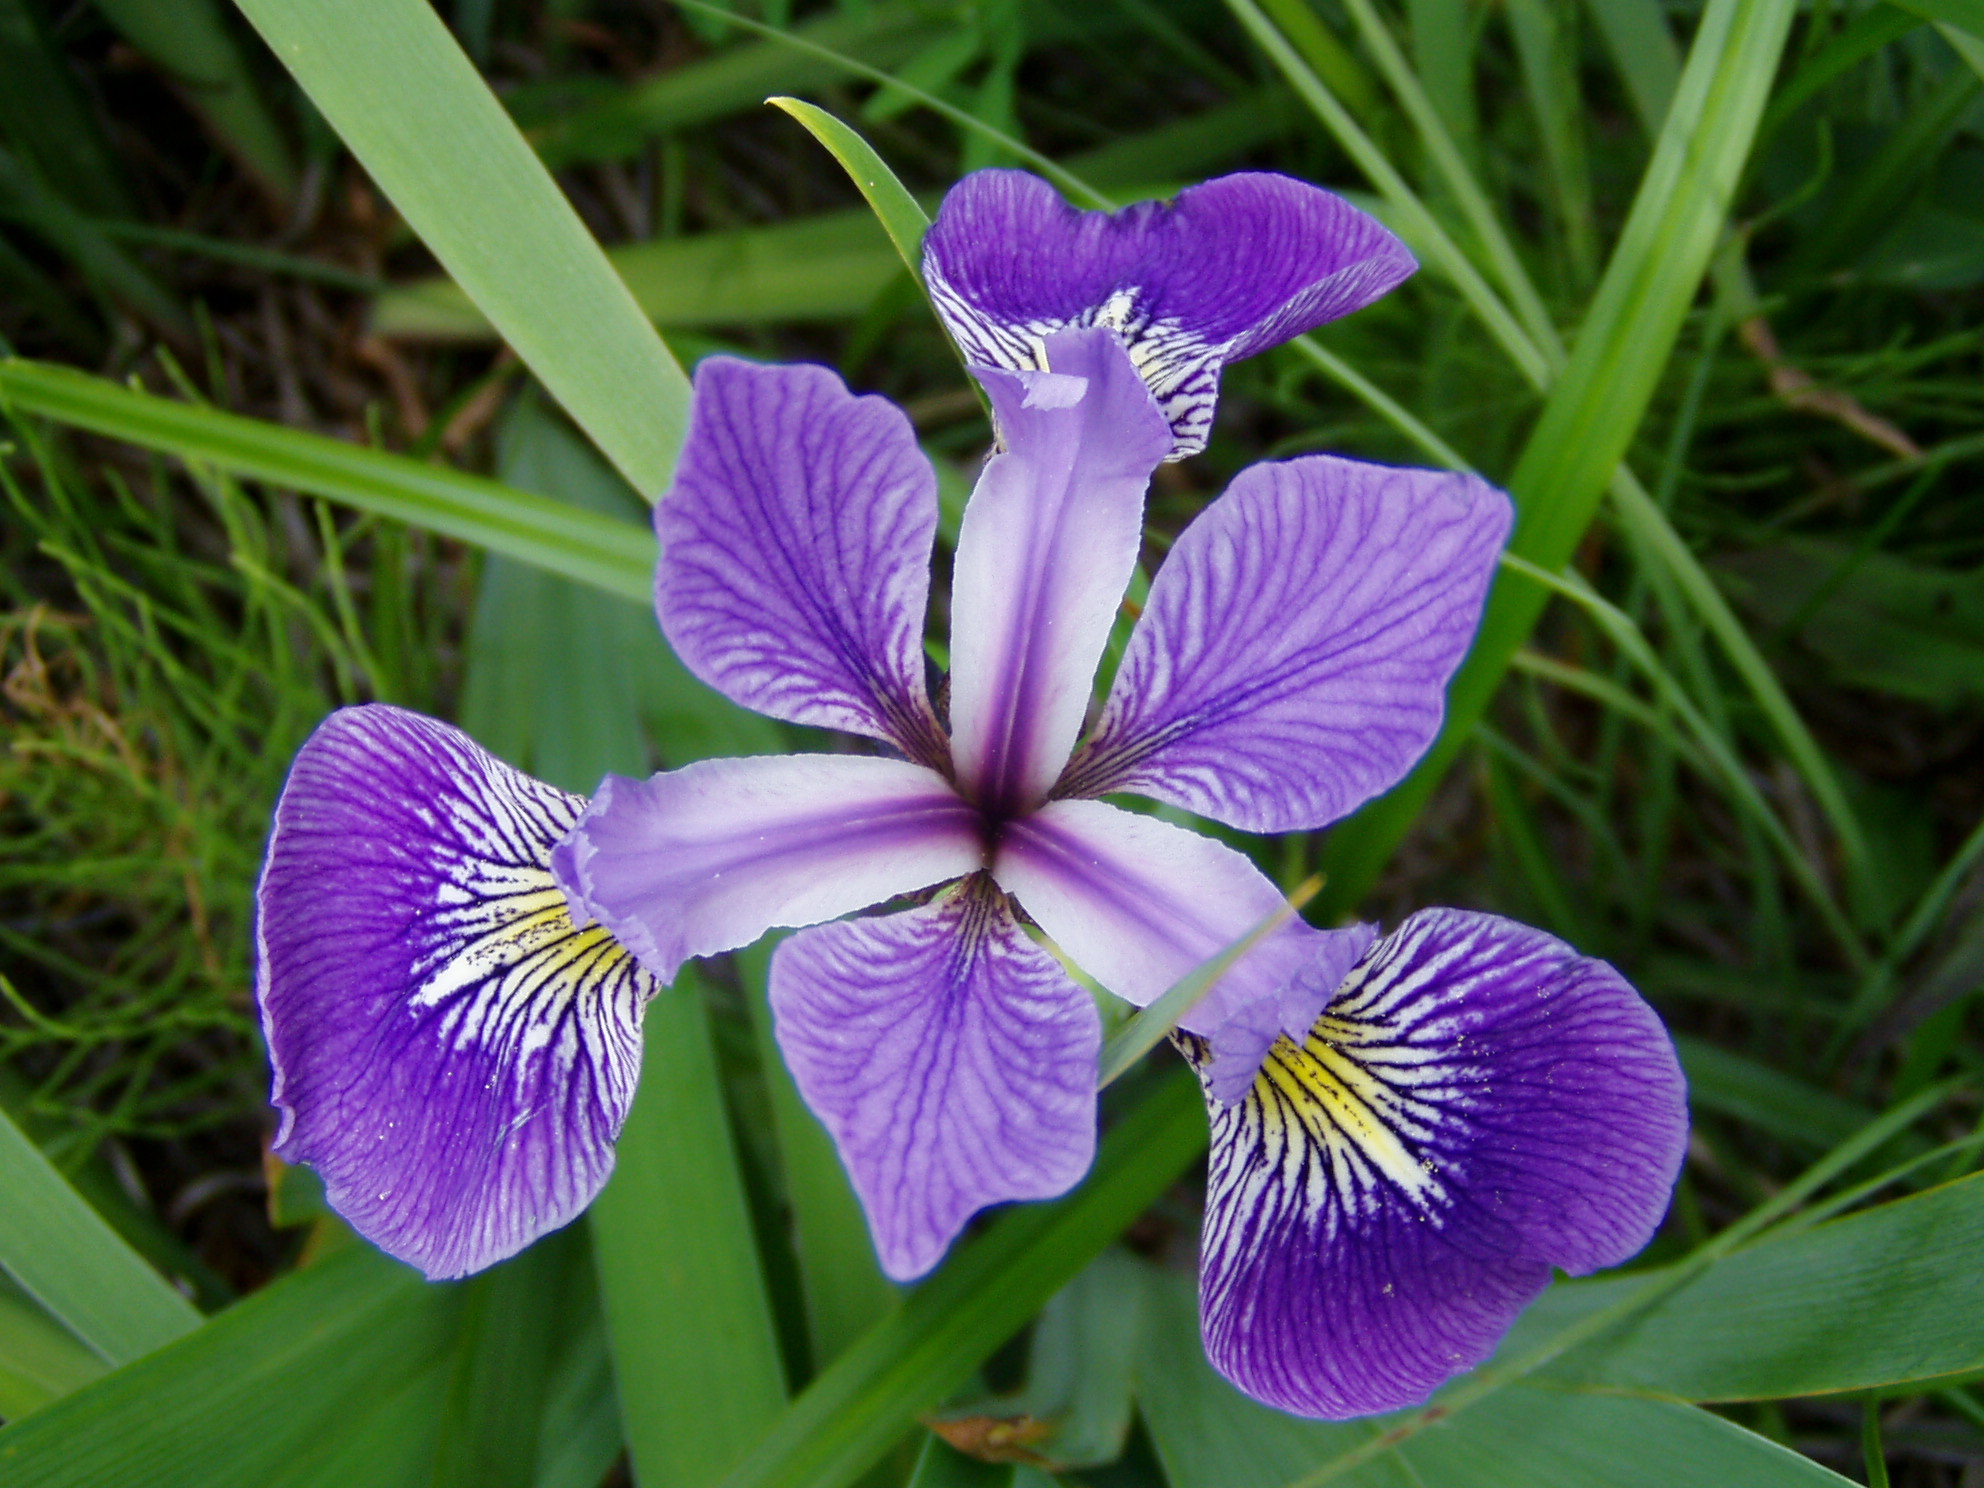

In [14]:
predictions = knn.predict([[6.4,3.2,4.5,1.5]])
print(predictions)
Image(source_setter(predictions) ,width=200, height=200)

In [15]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X,Y)

GaussianNB(priors=None)

['Iris-setosa']


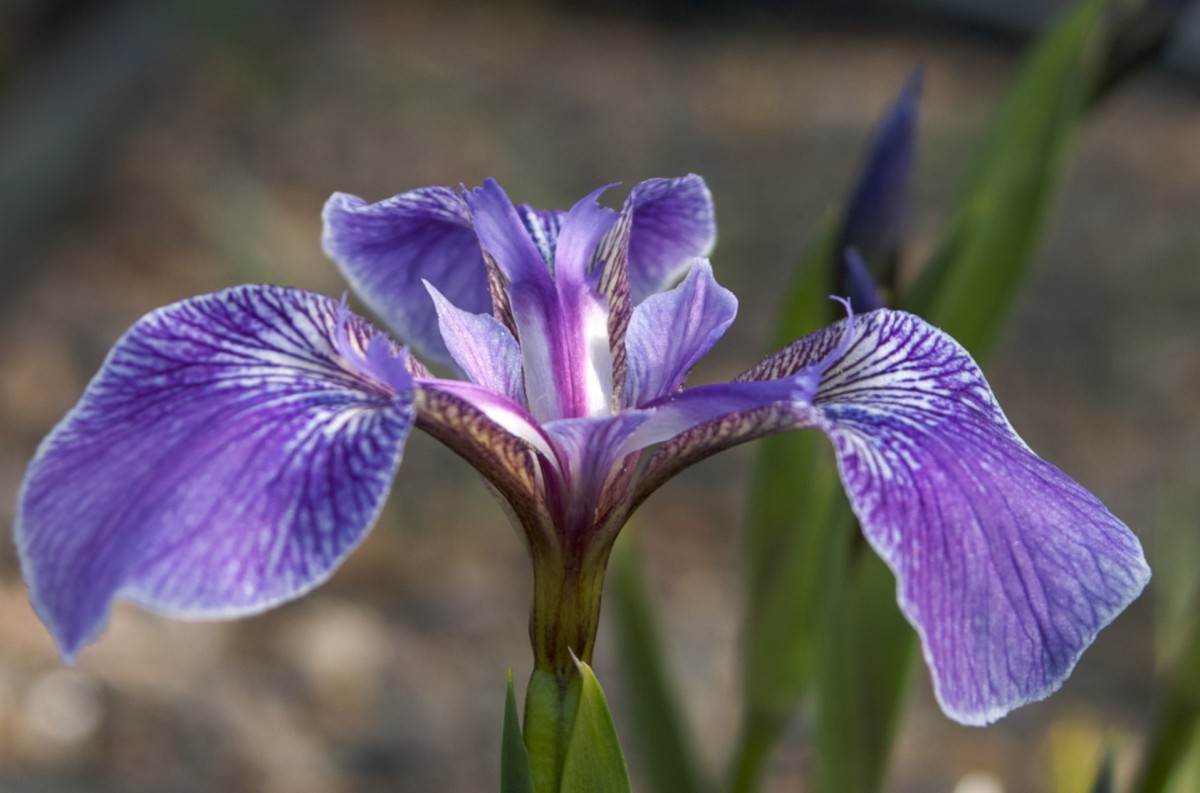

In [16]:
predictions = nb.predict([[5.3,3.7,1.5,0.2]])
print(predictions)
Image(source_setter(predictions) ,width=200, height=200)

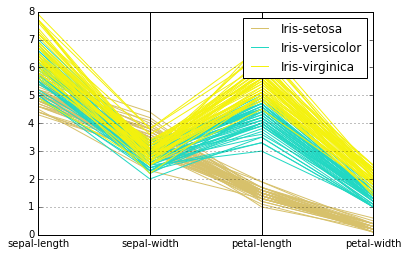

In [17]:
#plt.switch_backend('Agg') #this line and below needed on cloud env to avoid error like no DISPLAY variable
#%pylab inline #use alone or together with above line
parallel_coordinates(dataset,'class')
plt.show()

In [18]:
help(parallel_coordinates)

Help on function parallel_coordinates in module pandas.tools.plotting:

parallel_coordinates(frame, class_column, cols=None, ax=None, color=None, use_columns=False, xticks=None, colormap=None, axvlines=True, axvlines_kwds=None, **kwds)
    Parallel coordinates plotting.
    
    Parameters
    ----------
    frame: DataFrame
    class_column: str
        Column name containing class names
    cols: list, optional
        A list of column names to use
    ax: matplotlib.axis, optional
        matplotlib axis object
    color: list or tuple, optional
        Colors to use for the different classes
    use_columns: bool, optional
        If true, columns will be used as xticks
    xticks: list or tuple, optional
        A list of values to use for xticks
    colormap: str or matplotlib colormap, default None
        Colormap to use for line colors.
    axvlines: bool, optional
        If true, vertical lines will be added at each xtick
    axvlines_kwds: keywords, optional
        Options

In [19]:
import seaborn as sns
dataset.head()



sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

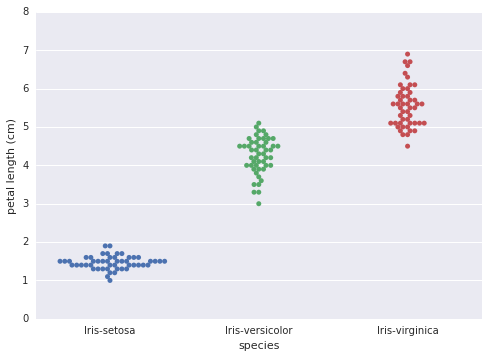

In [20]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='class', y='petal-length', data=dataset)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()   #shows all data points clealry to see which species have what size of petals

In [21]:

# Show the plot help
help(plt.show) #()

Help on function show in module matplotlib.pyplot:

show(*args, **kw)
    Display a figure.
    When running in ipython with its pylab mode, display all
    figures and return to the ipython prompt.
    
    In non-interactive mode, display all figures and block until
    the figures have been closed; in interactive mode it has no
    effect unless figures were created prior to a change from
    non-interactive to interactive mode (not recommended).  In
    that case it displays the figures but does not block.
    
    A single experimental keyword argument, *block*, may be
    set to True or False to override the blocking behavior
    described above.



In [22]:
from sklearn import datasets 
datasets.load_iris

<function sklearn.datasets.base.load_iris>